In [30]:


import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
files_list = os.listdir(".")

files_csv_list = list(filter(lambda file_name: ".csv" in file_name, files_list))

In [3]:
files_csv_list

['00_NoSampleExtractor.csv',
 '00_RandomSampleExtractor_5000.csv',
 '00_SIFT3DExtractor.csv',
 '00_Harris3DExtractor.csv',
 '00_UniformSampleExtractor_5000.csv']

In [4]:
extractor_dfs = {}
list_of_extractors = []
for csv_name in files_csv_list:
    extractor_name = csv_name.split('_')[1].split('.')[0]
    list_of_extractors.append(extractor_name)
    extractor_dfs[extractor_name] =  pd.read_csv(csv_name)    

In [5]:
extractor_dfs[list_of_extractors[0]]

,Unnamed: 0,KP_Extract,Matching,KP_count,ATE
0,0,0.000002,0.000000,124668,1.091830
1,1,0.000083,8.444827,124605,1.462106
2,2,0.000157,1.852764,124478,1.722352
3,3,0.000004,1.124801,124167,1.824677
4,4,0.000003,1.058125,123969,1.907982
...,...,...,...,...,...
114,114,0.000003,1.609593,122621,9.353673
115,115,0.000005,1.236931,122638,9.383737
116,116,0.000004,2.040150,122577,9.413314
117,117,0.000004,1.641675,122408,9.442520


In [6]:
feature_names =["KP_Extract",	"Matching",	"KP_count",	"ATE"]

In [7]:
extractor_dfs[list_of_extractors[0]]

,Unnamed: 0,KP_Extract,Matching,KP_count,ATE
0,0,0.000002,0.000000,124668,1.091830
1,1,0.000083,8.444827,124605,1.462106
2,2,0.000157,1.852764,124478,1.722352
3,3,0.000004,1.124801,124167,1.824677
4,4,0.000003,1.058125,123969,1.907982
...,...,...,...,...,...
114,114,0.000003,1.609593,122621,9.353673
115,115,0.000005,1.236931,122638,9.383737
116,116,0.000004,2.040150,122577,9.413314
117,117,0.000004,1.641675,122408,9.442520


In [57]:
summary_values_extractors = {}

for extractor in extractor_dfs:
    summary_values_extractors[extractor]={}
    extractor_df = extractor_dfs[extractor]
    summary_values_extractors[extractor][feature_names[0]+"_avg"] = extractor_df[feature_names[0]].mean()
    summary_values_extractors[extractor][feature_names[1]+"_avg"] = extractor_df[feature_names[1]].mean()
    summary_values_extractors[extractor]["Total_time"] = summary_values_extractors[extractor][feature_names[0]+"_avg"] +summary_values_extractors[extractor][feature_names[1]+"_avg"]

    summary_values_extractors[extractor][feature_names[3]+"_max"] = extractor_df[feature_names[3]].max()    
    summary_values_extractors[extractor][feature_names[2]+"_avg"] = extractor_df[feature_names[2]].mean()



In [58]:
extractors_summary = pd.DataFrame.from_dict(summary_values_extractors)

In [59]:
extractors_summary.T

,KP_Extract_avg,Matching_avg,Total_time,ATE_max,KP_count_avg
NoSampleExtractor,0.000033,1.518265,1.518298,9.471637,121558.117647
RandomSampleExtractor,0.003562,0.024359,0.027921,14.750419,5000.000000
SIFT3DExtractor,4.182035,0.007598,4.189633,24.281765,737.722689
Harris3DExtractor,3.436663,1.365904,4.802566,9.471095,121558.117647
UniformSampleExtractor,0.082075,0.025068,0.107144,8.034668,4907.605042


In [60]:
# fig, ax = plt.subplots()
# # hide axes

# fig.patch.set_visible(True)
# ax.axis('off')
# ax.axis('tight')

# ax.table(cellText=extractors_summary.T.values, colLabels=extractors_summary.T.columns)

# fig.tight_layout()

# plt.savefig("table.png")
# plt.show()

In [61]:
x_labels = list(extractors_summary.keys())
y_labels = list(extractors_summary.T.keys())

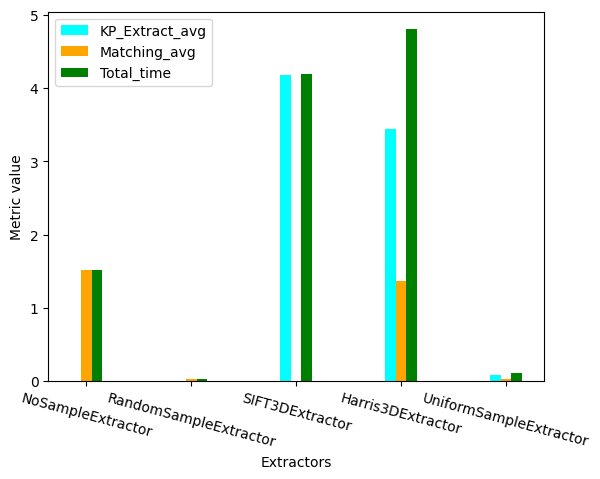

In [64]:
x = np.arange(5)
width = 0.1
  
# plot data in grouped manner of bar type
plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
plt.bar(x, extractors_summary.T["Matching_avg"], width, color='orange')
plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
#plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
plt.xticks(x, x_labels, rotation=-15)
plt.xlabel("Extractors")
plt.ylabel("Metric value")
plt.legend(y_labels)
#plt.show()

plt.savefig("average_time_plot.png")

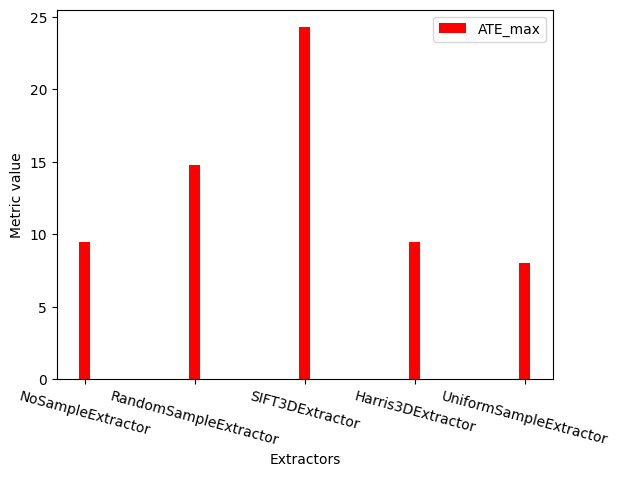

In [67]:
x = np.arange(5)
width = 0.1
  
# plot data in grouped manner of bar type
#plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
plt.bar(x, extractors_summary.T["ATE_max"], width, color='red')
#plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
#plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
plt.xticks(x, x_labels, rotation=-15)
plt.xlabel("Extractors")
plt.ylabel("Metric value")
plt.legend(y_labels[3:])
#plt.show()

plt.savefig("ATE_plot.png")

In [68]:
extractor_ATEs = {}

for extractor in extractor_dfs:
    extractor_ATEs[extractor]={}
    extractor_df = extractor_dfs[extractor]
    extractor_ATEs[extractor] = extractor_df[feature_names[3]]

In [73]:
ates_df = pd.DataFrame.from_dict(extractor_ATEs)

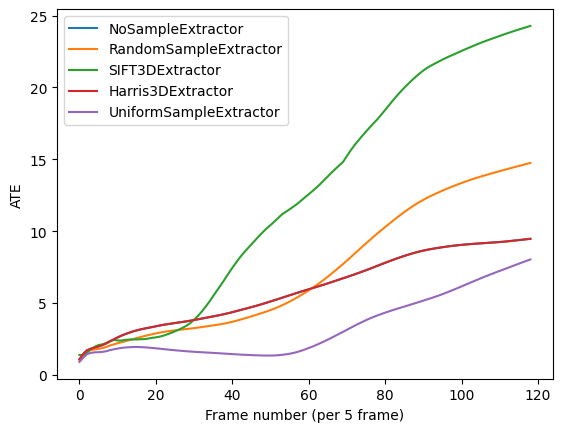

In [82]:
plt.plot(ates_df)
plt.xlabel("Frame number (per 5 frame)")
plt.ylabel("ATE")
plt.legend(x_labels)

plt.savefig("ate_per_frame.png")
